# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json

# import linregress method from scipy module
from scipy.stats import linregress

# import citipy module -- determines city based on coordinates (lat, lon)
from citipy import citipy
from datetime import datetime
from pprint import pprint

# import api key for open weather
from config import api_key_weather

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
## Create list based on ziped values. Need list to display lat & lng associated with city (these are citipy co-ords from np.random)
coordinates = list(lat_lngs)

In [4]:
# Create variables to store lists FROM citipy library
cities = []
latitudes = []
longitudes = []

In [5]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    lat = coordinate[0]
    lon = coordinate[1]

    # If city is not in list of cities, add the city to the list.
    if city not in cities:
        cities.append(city)
    
#     # if you want to see 
#     if lat not in latitudes:
#         latitudes.append(lat)
        
#     if lon not in longitudes:
#         longitudes.append(lon)
#     print(f"{city}: has coordinates of {(str(coordinate[0]) + ', ' + str(coordinate[1]))}")  
        
# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [6]:
# create variable to store base URL.
base = "http://api.openweathermap.org/data/2.5/weather?"

# create variable to store unit of measure to pass into API -- imperial returns Farenheit and MPH
units = "metric"

# create partial URL (base + unit of measures)
query_url = f"{base}&units={units}&appid={api_key_weather}"

In [7]:
# preview API Call for fields before querying 500+ cities

# provide sample city - Paris
city = 'paris'

# update city url
city_url = query_url + "&q=" + city

# execute get request and store response as json
request = requests.get(city_url)
response = request.json()

# pretty print response
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 48.8534,
        "lon": 2.3488
    },
    "dt": 1675916100,
    "id": 2988507,
    "main": {
        "feels_like": -2.24,
        "humidity": 81,
        "pressure": 1031,
        "temp": -2.24,
        "temp_max": -0.48,
        "temp_min": -5.66
    },
    "name": "Paris",
    "sys": {
        "country": "FR",
        "id": 2041230,
        "sunrise": 1675926579,
        "sunset": 1675962003,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.03
    }
}


In [8]:
# Create an empty list to hold the weather data.
city_data = []

In [9]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count = set_count + 1
        record_count = 1
        time.sleep(5)
        
    # Create endpoint URL with each city.
    city_url = query_url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        response = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_current = response["weather"][0]["main"]
        city_description = response["weather"][0]["description"]
        city_feels_like = response["main"]["feels_like"]
        city_temp = response["main"]["temp"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_date = (datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d'))
        city_country = response["sys"]["country"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Current Weather": city_current,
                          "Weather Description": city_description,
                          "Feels Like": city_feels_like,
                          "Temp": city_temp,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date,
                          "Country": city_country})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        city_data.append({"City": city.title(),
                          "Lat": "Na",
                          "Lng": "Na",
                          "Current Weather": "Na",
                          "Weather Description": "Na",
                          "Feels Like": "Na",
                          "Temp": "Na",
                          "Max Temp": "Na",
                          "Humidity": "Na",
                          "Cloudiness": "Na",
                          "Wind Speed": "Na",
                          "Date": "Na",
                          "Country": "Na"})

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tarko-sale
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | clarence town
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | dabakala
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | mandera
Processing Record 19 of Set 1 | kachug
Processing Record 20 of Set 1 | garden city
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 

Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | nouadhibou
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | balykshi
Processing Record 42 of Set 4 | dargaville
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | salinopolis
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | kars
Processing Record 47 of Set 4 | amudat
Processing Record 48 of Set 4 | koslan
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | olafsvik
Processing Record 2 of Set 5 | fez
Processing Record 3 of Set 5 | bissau
Processing Record 4 of Set 5 | alta floresta
Processing Record 5 of Set 5 | monroe
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | asau
Processing Record 9 of Set 5 | mayo
Processing Record 10 of Set 5 | shunyi
Proc

Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | boyuibe
Processing Record 30 of Set 8 | chiang klang
Processing Record 31 of Set 8 | ixtlahuacan del rio
Processing Record 32 of Set 8 | nyuksenitsa
Processing Record 33 of Set 8 | dalvik
Processing Record 34 of Set 8 | prince rupert
Processing Record 35 of Set 8 | potanino
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | the pas
Processing Record 38 of Set 8 | santa rosa
Processing Record 39 of Set 8 | kaitangata
Processing Record 40 of Set 8 | omutinskoye
City not found. Skipping...
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | merrill
Processing Record 43 of Set 8 | polunochnoye
Processing Record 44 of Set 8 | lydenburg
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of Set 8 | tulsipur
Processing Record 47 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 48 of Set 8 | prata
Processing Record 49 of Set 8 | torbay
Proce

Processing Record 14 of Set 12 | anshun
Processing Record 15 of Set 12 | dashitou
Processing Record 16 of Set 12 | tymovskoye
Processing Record 17 of Set 12 | islamabad
Processing Record 18 of Set 12 | sumter
Processing Record 19 of Set 12 | haibowan
City not found. Skipping...
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | strezhevoy
Processing Record 22 of Set 12 | abancay
Processing Record 23 of Set 12 | kazanka
Processing Record 24 of Set 12 | tevaitoa
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | honningsvag
Processing Record 28 of Set 12 | zmeinogorsk
Processing Record 29 of Set 12 | cam ranh
Processing Record 30 of Set 12 | hastings
Processing Record 31 of Set 12 | jam sahib
Processing Record 32 of Set 12 | toora-khem
Processing Record 33 of Set 12 | beroroha
Processing Record 34 of Set 12 | tashtyp
Processing Record 35 of Set 12 | vila velha
Processing Record

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                   619
Lat                    619
Lng                    619
Current Weather        619
Weather Description    619
Feels Like             619
Temp                   619
Max Temp               619
Humidity               619
Cloudiness             619
Wind Speed             619
Date                   619
Country                619
dtype: int64

In [11]:
# Display sample data
city_data_df

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Hilo,19.7297,-155.09,Rain,moderate rain,22.03,21.64,22.85,83,75,4.12,2023-02-09,US
1,Castro,-24.7911,-50.0119,Clouds,few clouds,16.37,16.21,16.21,95,12,2.39,2023-02-09,BR
2,Albany,42.6001,-73.9662,Clouds,broken clouds,-2.02,-2.02,0.33,80,81,1.23,2023-02-09,US
3,Punta Arenas,-53.15,-70.9167,Clear,clear sky,8.84,10.06,10.06,66,0,5.66,2023-02-09,CL
4,Illoqqortoormiut,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Iquique,-20.2208,-70.1431,Clear,clear sky,23.52,23.02,23.02,82,10,0.78,2023-02-09,CL
615,Praia,14.9215,-23.5087,Clouds,broken clouds,20.4,20.3,20.3,77,75,5.14,2023-02-09,CV
616,Te Anau,-45.4167,167.717,Clouds,scattered clouds,14.46,15.83,15.83,38,41,1.38,2023-02-09,NZ
617,Merauke,-8.4667,140.333,Clouds,broken clouds,31.93,27.76,27.76,83,83,5.74,2023-02-09,ID


In [12]:
# filter data to exclude records where values are "NA" -- save to separate DataFrame to understand what cities were dropped
clean_city_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]!= "Na"),:])
clean_city_df

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Hilo,19.7297,-155.09,Rain,moderate rain,22.03,21.64,22.85,83,75,4.12,2023-02-09,US
1,Castro,-24.7911,-50.0119,Clouds,few clouds,16.37,16.21,16.21,95,12,2.39,2023-02-09,BR
2,Albany,42.6001,-73.9662,Clouds,broken clouds,-2.02,-2.02,0.33,80,81,1.23,2023-02-09,US
3,Punta Arenas,-53.15,-70.9167,Clear,clear sky,8.84,10.06,10.06,66,0,5.66,2023-02-09,CL
5,Carnarvon,-24.8667,113.633,Clouds,broken clouds,32.86,30.79,30.79,53,63,6.73,2023-02-09,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Iquique,-20.2208,-70.1431,Clear,clear sky,23.52,23.02,23.02,82,10,0.78,2023-02-09,CL
615,Praia,14.9215,-23.5087,Clouds,broken clouds,20.4,20.3,20.3,77,75,5.14,2023-02-09,CV
616,Te Anau,-45.4167,167.717,Clouds,scattered clouds,14.46,15.83,15.83,38,41,1.38,2023-02-09,NZ
617,Merauke,-8.4667,140.333,Clouds,broken clouds,31.93,27.76,27.76,83,83,5.74,2023-02-09,ID


In [13]:
# Export the City_Data into a csv
clean_city_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
clean_city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
clean_city_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
0,Hilo,19.7297,-155.0900,Rain,moderate rain,22.03,21.64,22.85,83,75,4.12,2023-02-09,US
1,Castro,-24.7911,-50.0119,Clouds,few clouds,16.37,16.21,16.21,95,12,2.39,2023-02-09,BR
2,Albany,42.6001,-73.9662,Clouds,broken clouds,-2.02,-2.02,0.33,80,81,1.23,2023-02-09,US
3,Punta Arenas,-53.1500,-70.9167,Clear,clear sky,8.84,10.06,10.06,66,0,5.66,2023-02-09,CL
5,Carnarvon,-24.8667,113.6333,Clouds,broken clouds,32.86,30.79,30.79,53,63,6.73,2023-02-09,AU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

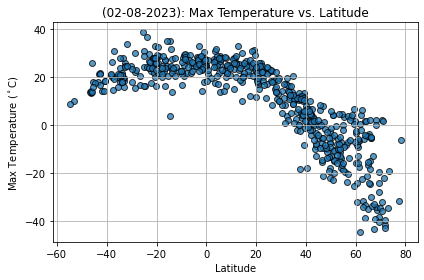

In [32]:
# Build scatter plot for latitude vs. temperature

# create timestampe for API Call
timestamp = datetime.now()
timestamp = timestamp.strftime("%m-%d-%Y")

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Max Temp"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ($^\circ$C)")
plt.title(f"({timestamp}): Max Temperature vs. Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

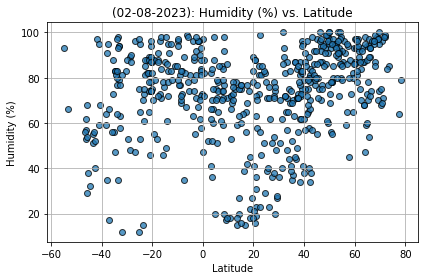

In [35]:
# Build scatter plot for latitude vs. temperature

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Humidity"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"({timestamp}): Humidity (%) vs. Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

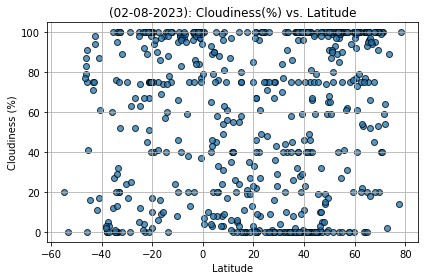

In [36]:
# Build the scatter plots for latitude vs. cloudiness

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Cloudiness"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"({timestamp}): Cloudiness(%) vs. Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

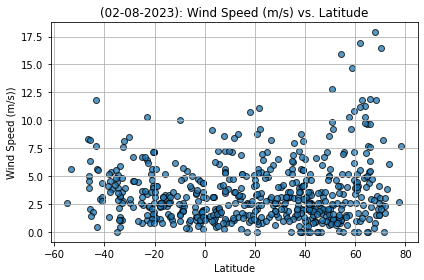

In [37]:
# Build the scatter plots for latitude vs. wind speed

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Wind Speed"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title(f"({timestamp}): Wind Speed (m/s) vs. Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("output_data/WindSpeed_vs_Latitude.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # generate regression values
    regress_values = x * slope + intercept
    
    # create string to display linear equation formula
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # set size for plot, graph
    fig1, ax1 = plt.subplots(figsize = (9,5))
    
    # generate scatter plot
    plt.scatter(x, y, edgecolor = "k", marker = "o")
    
    # add line for linear regression
    plt.plot(x, regress_values, "r-")
    
    # add axis labels
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    
    # add chart title
    plt.title(f"{hemisphere} - Hemisphere: {y_label} vs. {x_label}", fontsize = 10)
    
    # add linear regression annotations
    plt.annotate(line_eq, label_regression, fontsize = 10, color = "red")
    
    # print r-squared value
    print(f"the r-squared value is: {rvalue**2}")
    
    # print correlation coefficient (pearson r)
    correlation = st.pearsonr(x,y)
    print(f"the correlation between factors plotted in the graph is {round(correlation[0],2)}")
    

In [20]:
# Create a DataFrame for cities in the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(clean_city_df.loc[clean_city_df["Lat"]>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
0,Hilo,19.7297,-155.0900,Rain,moderate rain,22.03,21.64,22.85,83,75,4.12,2023-02-09,US
2,Albany,42.6001,-73.9662,Clouds,broken clouds,-2.02,-2.02,0.33,80,81,1.23,2023-02-09,US
8,Tarko-Sale,64.9225,77.7850,Clouds,overcast clouds,-23.48,-16.48,-16.48,94,93,7.73,2023-02-09,RU
9,Cabo San Lucas,22.8909,-109.9124,Clouds,scattered clouds,19.42,20.15,20.28,46,49,0.77,2023-02-09,MX
10,Tasiilaq,65.6145,-37.6368,Clouds,overcast clouds,-21.91,-14.91,-14.91,54,96,4.36,2023-02-09,GL


In [21]:
# Create a DataFrame for cities in the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(clean_city_df.loc[clean_city_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
1,Castro,-24.7911,-50.0119,Clouds,few clouds,16.37,16.21,16.21,95,12,2.39,2023-02-09,BR
3,Punta Arenas,-53.1500,-70.9167,Clear,clear sky,8.84,10.06,10.06,66,0,5.66,2023-02-09,CL
5,Carnarvon,-24.8667,113.6333,Clouds,broken clouds,32.86,30.79,30.79,53,63,6.73,2023-02-09,AU
6,Ushuaia,-54.8000,-68.3000,Clouds,few clouds,7.36,8.81,8.81,93,20,2.57,2023-02-09,AR
7,Mataura,-46.1927,168.8643,Clouds,overcast clouds,12.63,13.60,13.60,62,87,3.91,2023-02-09,NZ


###  Temperature vs. Latitude Linear Regression Plot

the r-squared value is: 0.7535319454041224
the correlation between factors plotted in the graph is -0.87


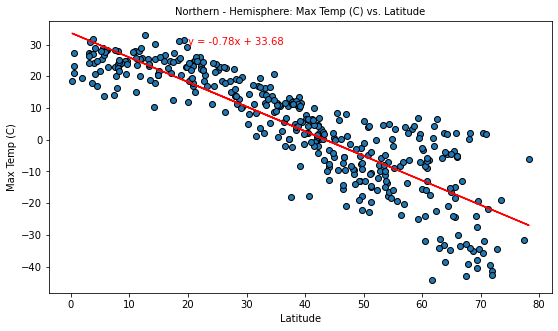

In [38]:
# linear regression of Max Temperature vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"
hemisphere = "Northern"
label_regression = (20,30)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Temp_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.2076023235664153
the correlation between factors plotted in the graph is 0.46


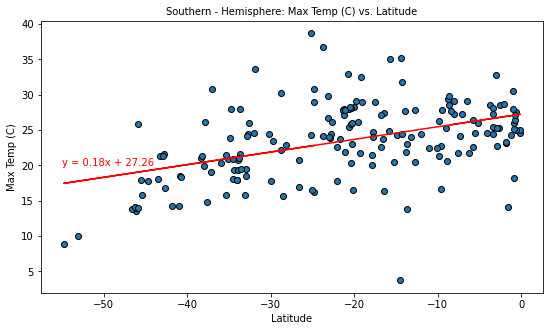

In [39]:
# Linear regression on Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"
hemisphere = "Southern"
label_regression = (-55,20)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Temp_vs_Lat.png")

# display graph
plt.show()

Northern Hemisphere: Based on the sample cities included in the regression, the model precits that the max temperature at the equator (y-intercept) is 32.83 Celcius.  For each degree you move from the equator, the tempereature decreases by 0.76 degrees.
The r-squared is 0.75408, which means that ~ 75.408% of the variation in the temperature can be explained by the latitude.

Southern Hemisphere: Based on the sample cities included in the regression, the model precits that the max temperature at the equator (y-intercept) is only 27.18 Celcius.  Each degree you move closer to the equator results in an increase in temperature of .18 (which is ~ 4x less than the slope in the northern hemisphere model)
The r-squared is 0.1743, which means that only ~ 17.438% of the variation in the temperature can be explained by the latitude.

At a very high level, a city's latitude explains more than half of the variation in temperature, whereas the latitude of a city in the southern hemisphere appears to explain little of the variation, suggesting other factors should be considered when predicting temperature.. 

### Humidity vs. Latitude Linear Regression Plot

the r-squared value is: 0.20639286718929709
the correlation between factors plotted in the graph is 0.45


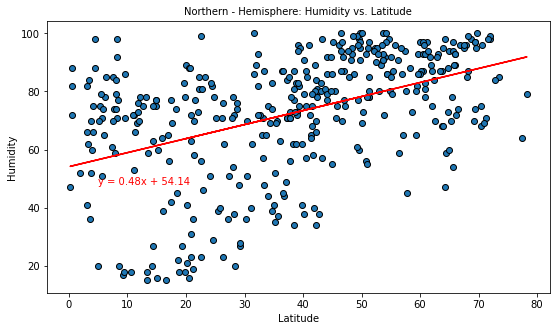

In [40]:
# linear regression of Humidity vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Northern"
label_regression = (5,48)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Humidity_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.11667229964089092
the correlation between factors plotted in the graph is 0.34


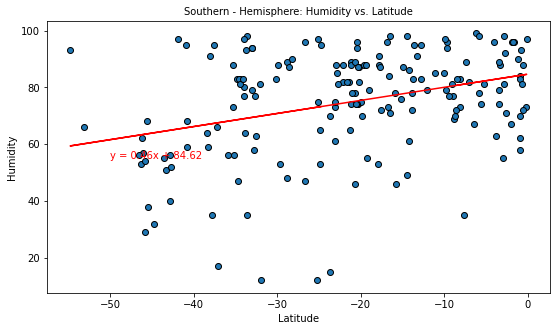

In [41]:
# linear regression of Humidity vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Southern"
label_regression = (-50,55)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Humidity_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at humidity and latitude.

It would have been more intersting and likely more relavent to analyze humidity and temperature vs latitude or proximity to water and humidity.

Based on the sample size the model for the Northern Hemisphere performs slightly better when attempting to predict humidity, looking at latitude as the independent variable. 

It is important to note that neither model explains a significant portion of the variation in humidity that can be explained by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r-squared value is: 0.07974563167516972
the correlation between factors plotted in the graph is 0.28


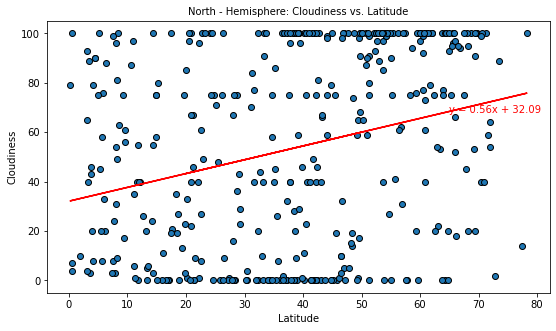

In [42]:
# linear regression of Cloudiness vs. Latitude for Norhern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "North"
label_regression = (65,68)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Cloudiness_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.1459410699754107
the correlation between factors plotted in the graph is 0.38


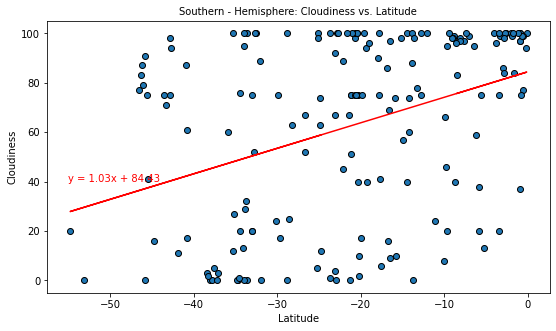

In [43]:
# linear regression of Cloudiness vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Southern"
label_regression = (-55,40)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Cloudiness_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at cloudiness and latitude. 

It would have been more relavent to analyze humidity and cloudiness or wind speed and cloudiness vs latitude.

Based on the sample size the model for the Southern Hemisphere performs slightly better when attempting to predict cloudiness, looking at latitude as the independent variable. 

It is important to note that neither model explains a significant portion of the variation in cloudiness that can be explained by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-squared value is: 0.02483841087699574
the correlation between factors plotted in the graph is 0.16


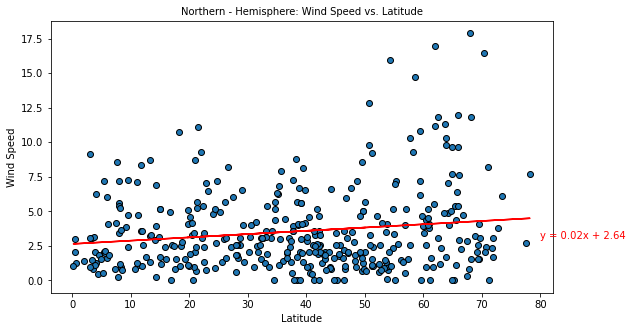

In [44]:
# linear regression of Wind Speed vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Northern"
label_regression = (80,3)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-W.Speed_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.09979209964064323
the correlation between factors plotted in the graph is -0.32


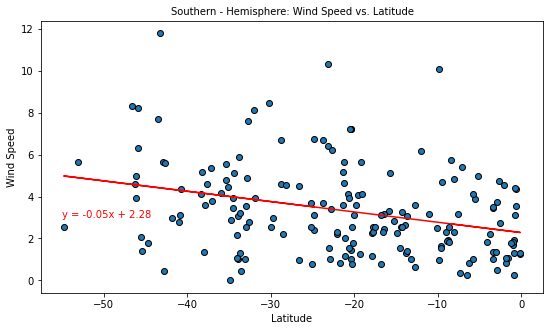

In [45]:
# linear regression of Wind Speed vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Southern"
label_regression = (-55,3)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-W.Speed_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at windspeed and latitude.

It would have been more relavent to analyze windspeed and temperature, or air pressure and windspeed than vs latitude.

It is important to note that neither model explains a significant portion of the variation in wind speed that can be explained by the latitude.
The correlation coefficient for the northern hemisphere is effectively 0; which indicates that there is no linear relationship between wind speed and latitude.  

The correlation for the southern hemisphere is negative relationship; which can be interpreted as wind speed decreases as latitude increases --- ie it is windier further from the equator 